In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.nonparametric.smoothers_lowess as sm_lowess


# Charger les données
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# Afficher la forme et les colonnes du Train et Test sets
print("=== TRAIN SET ===")
print(train.shape)
print(train.columns)

print("\n=== TEST SET ===")
print(test.shape)
print(test.columns)

# Aperçu des premières lignes
train.head()


=== TRAIN SET ===
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

=== TEST SET ===
(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Étudier les valeurs manquantes

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

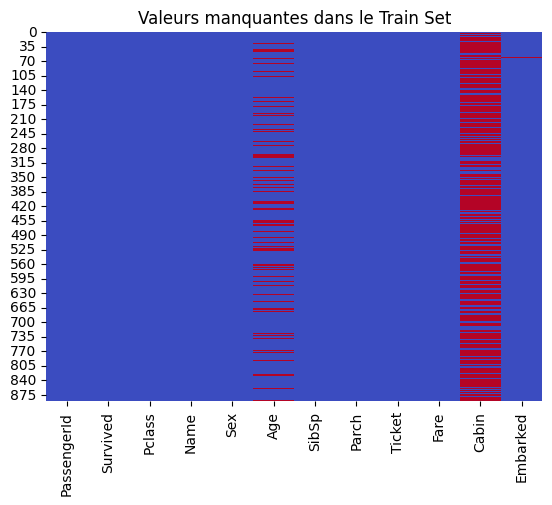

In [5]:
plt.Figure(figsize=(10,5))
sns.heatmap(train.isnull(), cbar=False, cmap='coolwarm')
plt.title("Valeurs manquantes dans le Train Set")
plt.show()

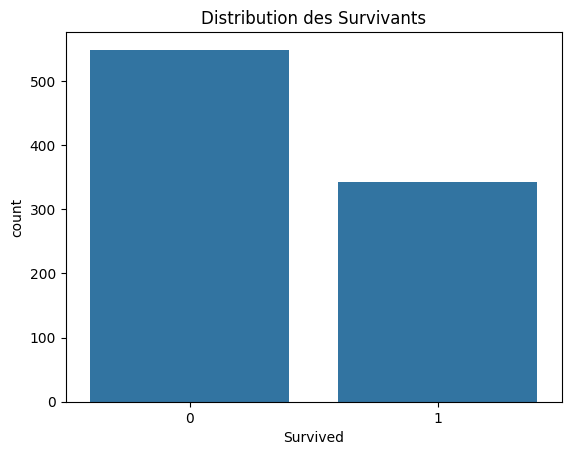

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [6]:
sns.countplot(data=train, x='Survived')
plt.title("Distribution des Survivants")
plt.show()

train['Survived'].value_counts(normalize=True)

Environ 38 % des passagers ont survécu

62 % sont morts

# Survie selon le sexe

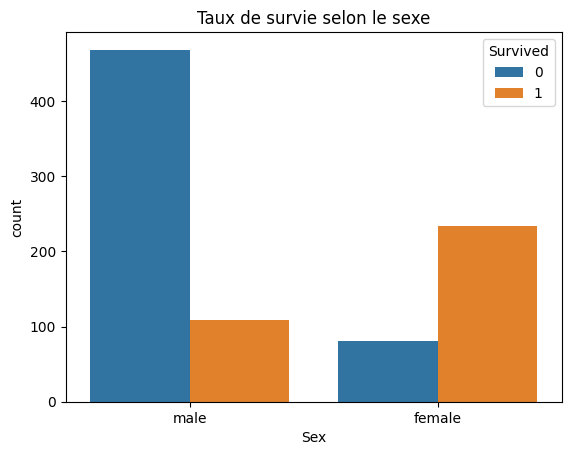

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [7]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Taux de survie selon le sexe")
plt.show()

train.groupby('Sex')['Survived'].mean()


74 % des femmes ont survécu

19 % des hommes seulement

# Survie selon la classe (Pclass)

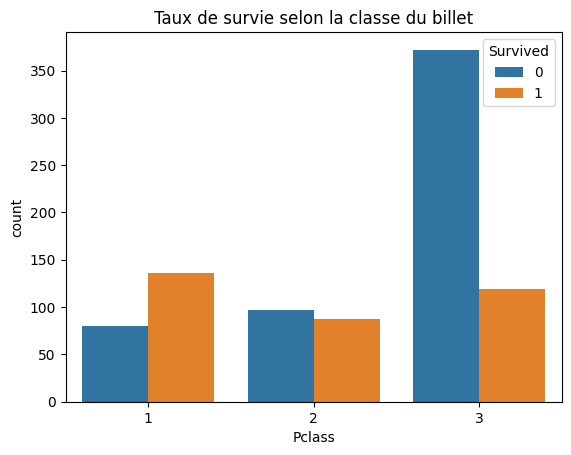

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [8]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("Taux de survie selon la classe du billet")
plt.show()

train.groupby('Pclass')['Survived'].mean()


# Survie selon l’âge

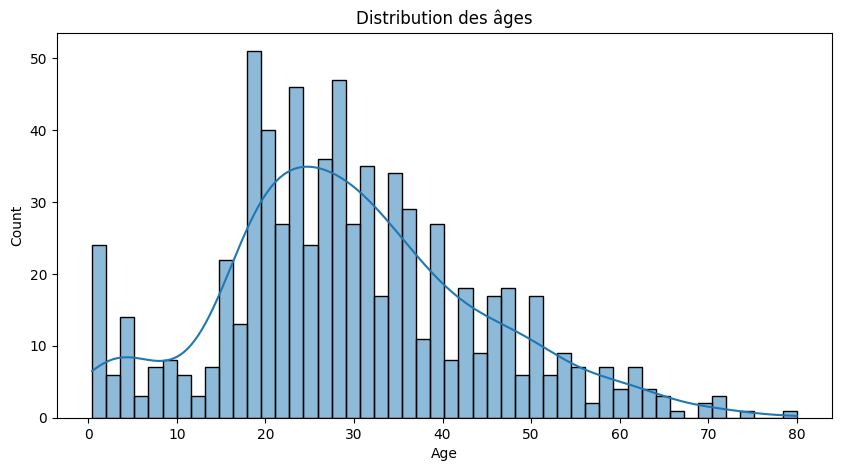

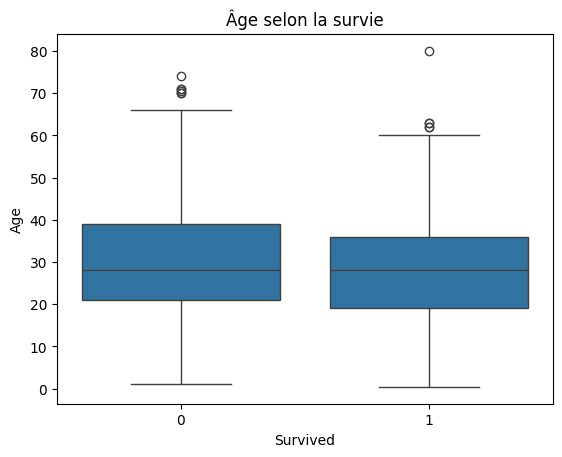

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(train['Age'], bins=50, kde=True)
plt.title("Distribution des âges")
plt.show()

sns.boxplot(data=train, x='Survived', y='Age')
plt.title("Âge selon la survie")
plt.show()


In [3]:
import sys
!"{sys.executable}" -m pip install statsmodels


Could not find platform independent libraries <prefix>

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# courbe LOWESS = la probabilité de survie selon l’âge

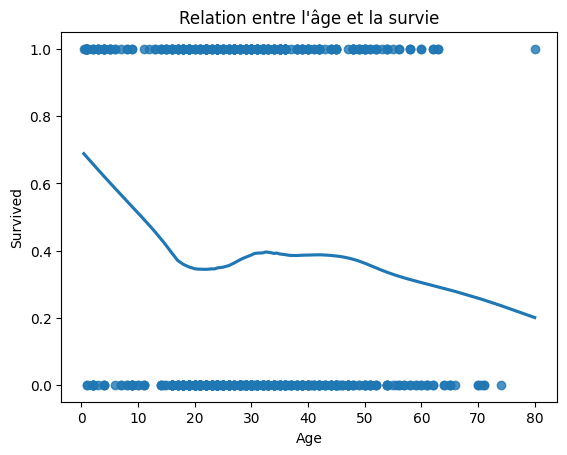

In [10]:
sns.regplot(x='Age', y='Survived', data=train, lowess=True)
plt.title("Relation entre l'âge et la survie")
plt.show()

- La corrélation linéaire Age–Survived est faible
- mais la relation est clairement non linéaire

Enfants → survie haute   ****        Adultes → survie moyenne      ****       Seniors → survie faible

In [84]:
import sys
sys.executable


'c:\\Users\\hamza\\projets data scientist\\projet titanic\\01_titanic_statistical_analysis\\.venv\\Scripts\\python.exe'

# Survie selon le port d’embarquement (Embarked)

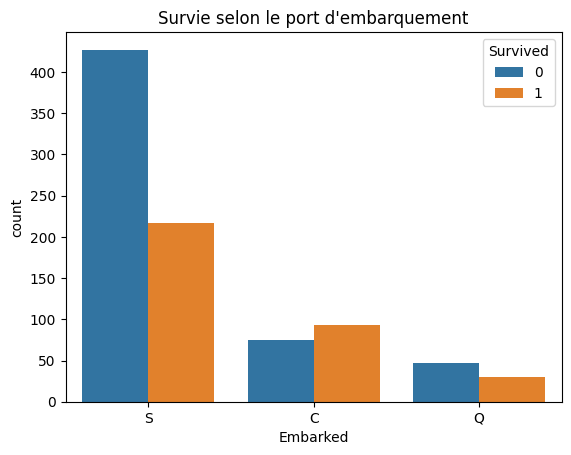

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [11]:
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.title("Survie selon le port d'embarquement")
plt.show()

train.groupby('Embarked')['Survived'].mean()


# Survie selon le prix du billet (Fare)

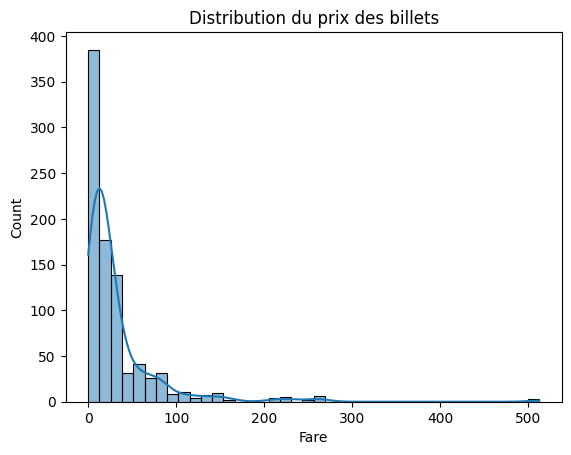

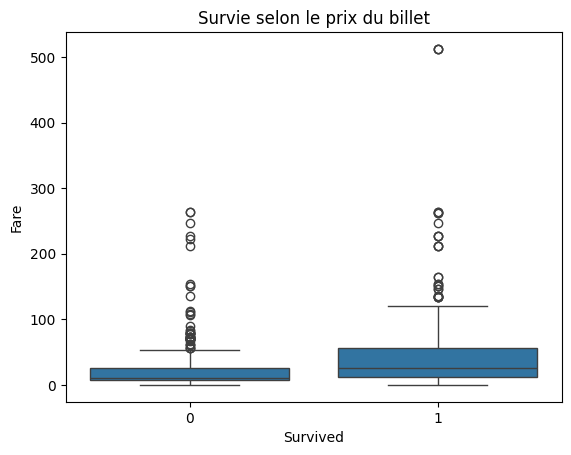

In [12]:
sns.histplot(train['Fare'], bins=40, kde=True)
plt.title("Distribution du prix des billets")
plt.show()

sns.boxplot(data=train, x='Survived', y='Fare')
plt.title("Survie selon le prix du billet")
plt.show()


Conversion en valeurs numériques : male = 0 , female = 1

In [13]:
train['Sex'].head()



0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

Conversion en valeurs numériques : 'S'= 0 , 'C'=1, 'Q'=2

In [14]:
train['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

# matrice de corrélation

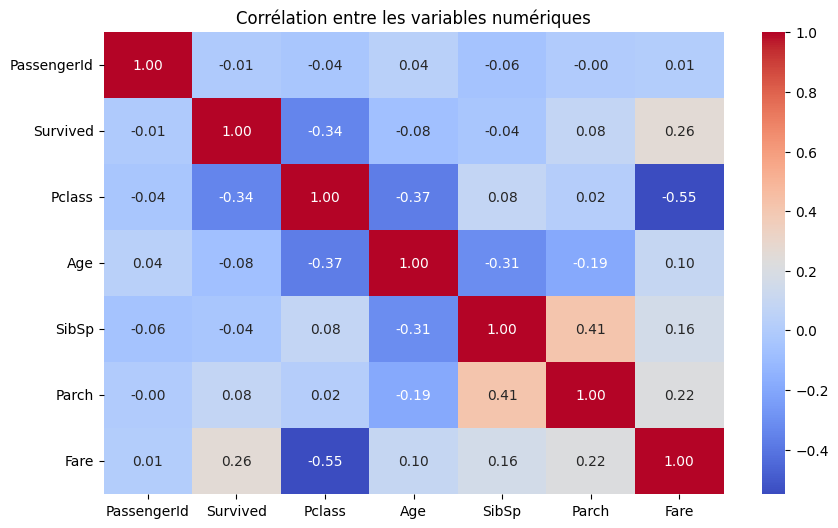

In [15]:
df_num = train.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables numériques")
plt.show()

# Nettoyer complètement les valeurs manquantes

j'ai remarqué que il y a 177 valeurs manquantes de la variable âge et 687 de la variable cabin et 2 pour la variable embarked

la valeur qui représente un grand impacte par rapport aux autres c'est l'age, en plus il ya bcp des valeurs manquantes, alors j'ai décidé de opter une méthode qui me semble bien pour remplir les valeurs manquantes : remplacer les valeurs manquantes par la médiane des groupes trié par le titre dans le nom du passagers : 

| Title   | âge médian          |
| ------- | ------------------- |
| Master  | **4 ans** → enfants |
| Miss    | **21 ans**          |
| Mrs     | **36 ans**          |
| Mr      | **30 ans**          |
| Officer | **46 ans**          |
| Noble   | **45 ans**          |


In [17]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train['Embarked'].isnull().sum()
train['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Les ponts A-B-C = riches → probabilité de survie plus élevée

U = passagers pauvres ou sans cabine enregistrée

# Matrice de corrélation avec les nouvelles colonnes

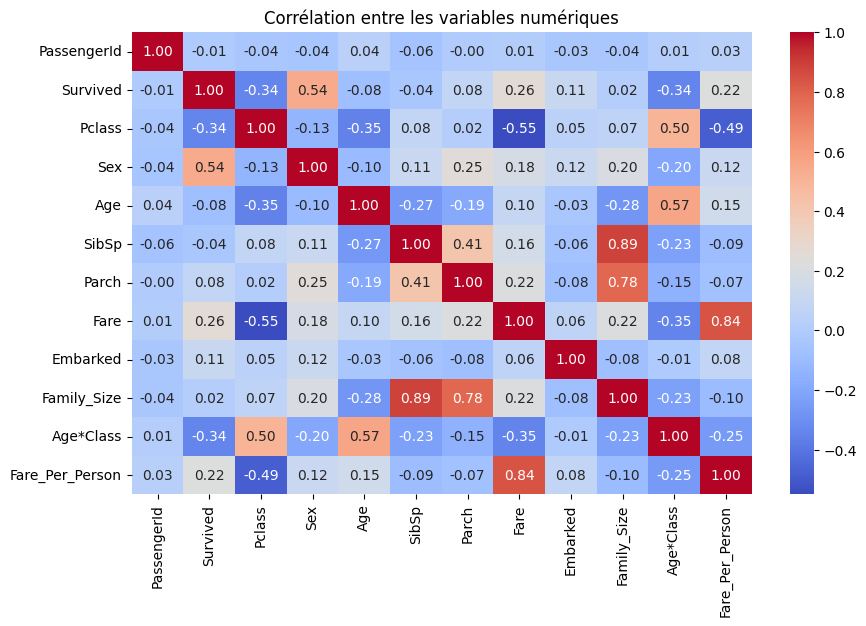

In [113]:
df_num = train.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les variables numériques")
plt.show()

# Maintenant faire une étude similaire sur le fichier de test 

In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

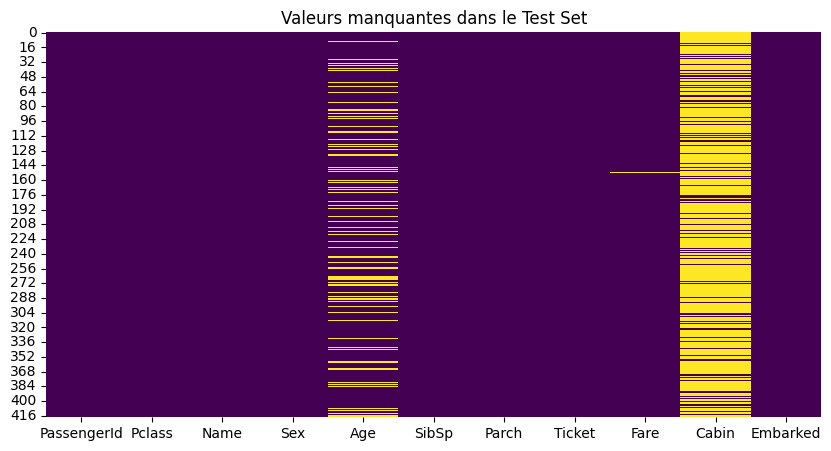

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title("Valeurs manquantes dans le Test Set")
plt.show()

# Concaténer ( train -> test )

In [24]:
# 1) Concat train + test
len_train = len(train)
full = pd.concat([train, test], sort=False).reset_index(drop=True)

# 2) Title
full["Title"] = full["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
full["Title"] = full["Title"].replace(['Mlle','Ms'], 'Miss')
full["Title"] = full["Title"].replace(['Mme'], 'Mrs')
full["Title"] = full["Title"].replace(['Lady','Countess','Dona','Sir','Don','Jonkheer'], 'Noble')
full["Title"] = full["Title"].replace(['Capt','Col','Major','Rev','Dr'], 'Officer')

# 3) Age par médiane du Title
full["Age"] = full.groupby("Title")["Age"].transform(lambda x: x.fillna(x.median()))

full['Age*Class'] = full['Age'] * full['Pclass']

# 4) FamilySize (UNE seule version, on garde ce nom)
full["FamilySize"] = full["SibSp"] + full["Parch"] + 1

# 5) Deck à partir de Cabin
full['Cabin'] = full['Cabin'].fillna('Unknown')
full["Deck"] = full["Cabin"].str[0]


# 6) Embarked : on garde S/C/Q en texte (très important)
full["Embarked"] = full["Embarked"].fillna(full["Embarked"].mode()[0])
full["Embarked"] = full["Embarked"].astype(str)

# 7) Fare + FarePerPerson (UNE seule version)
full["Fare"] = full["Fare"].fillna(full["Fare"].median())
full["FarePerPerson"] = full["Fare"] / full["FamilySize"]


<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hamza\AppData\Local\Temp\ipykernel_17268\1010371242.py:6: SyntaxWarning: invalid escape sequence '\.'
  full["Title"] = full["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)


In [25]:
full[["Name", "Title"]].head()


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [26]:
full["Title"].value_counts()


Title
Mr         757
Miss       264
Mrs        198
Master      61
Officer     23
Noble        6
Name: count, dtype: int64

In [27]:
full[["Title", "Age"]].isnull().sum()


Title    0
Age      0
dtype: int64

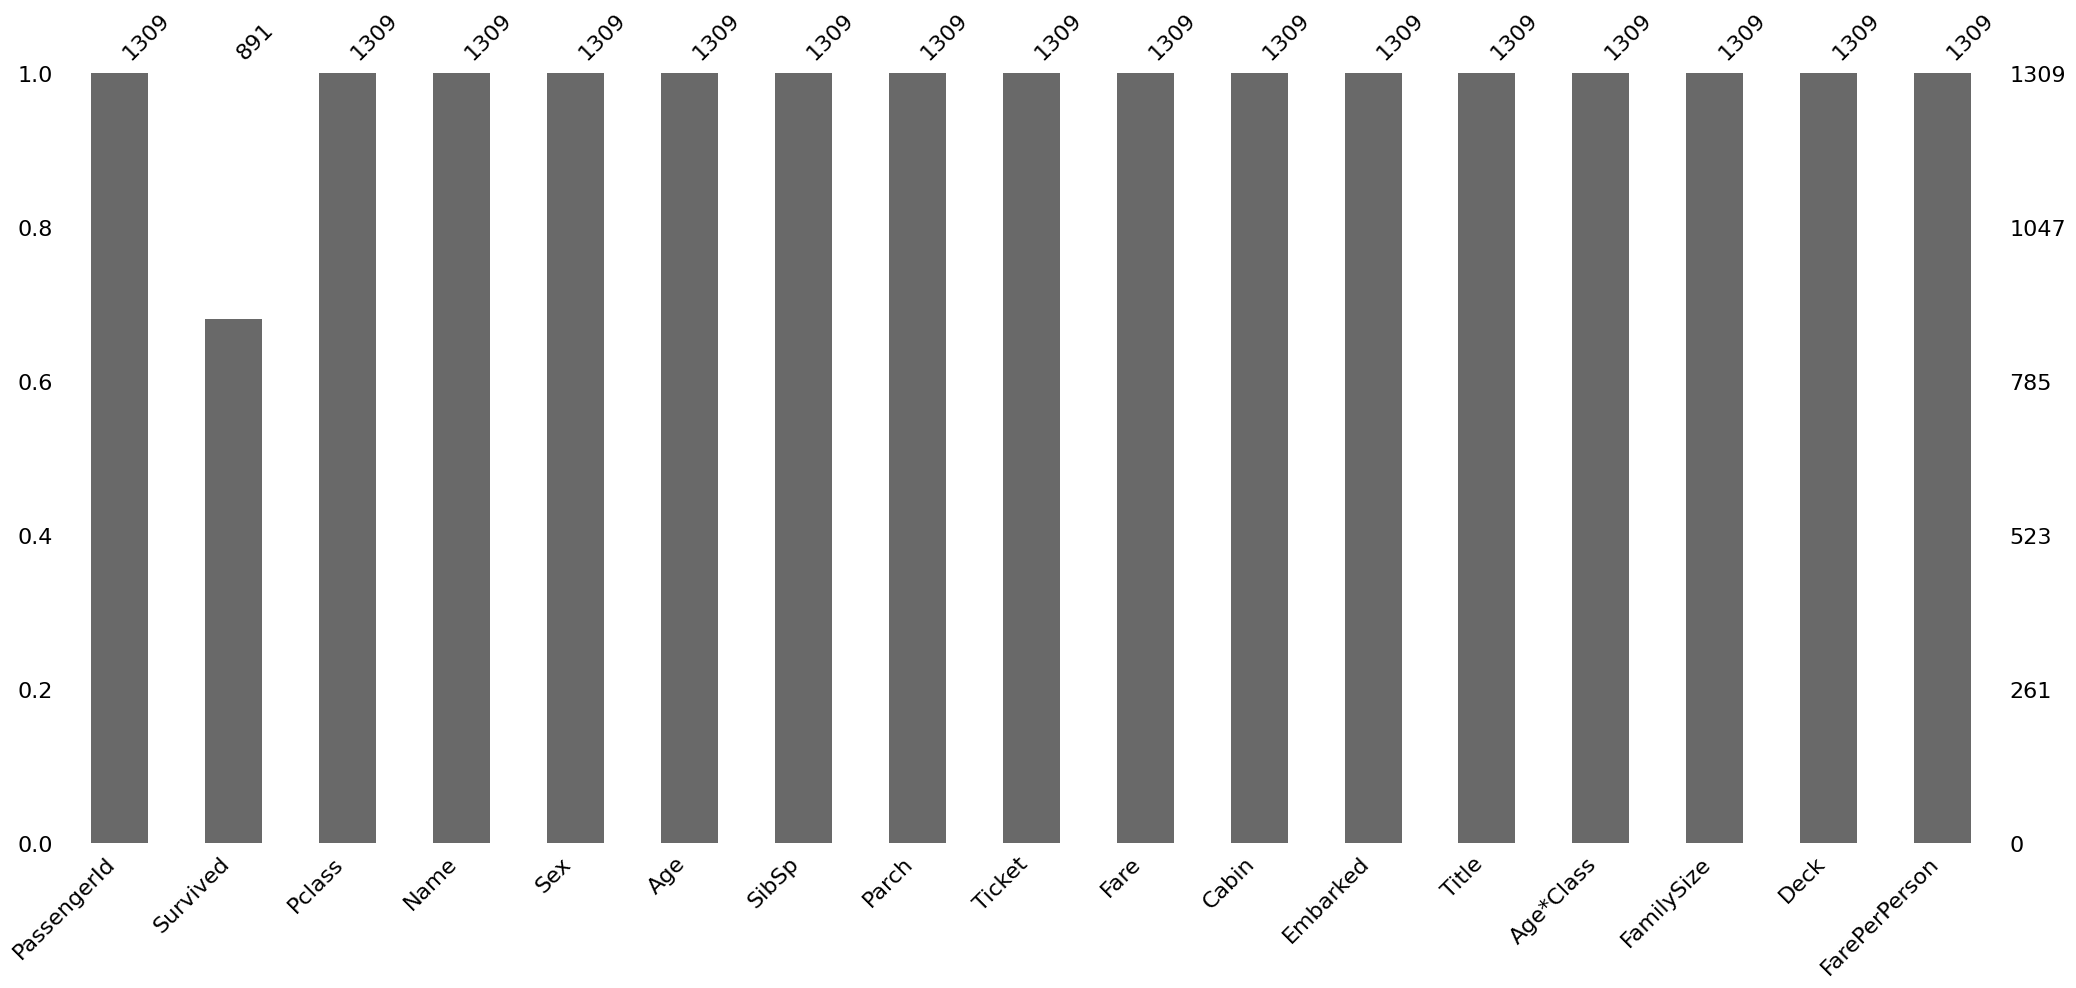

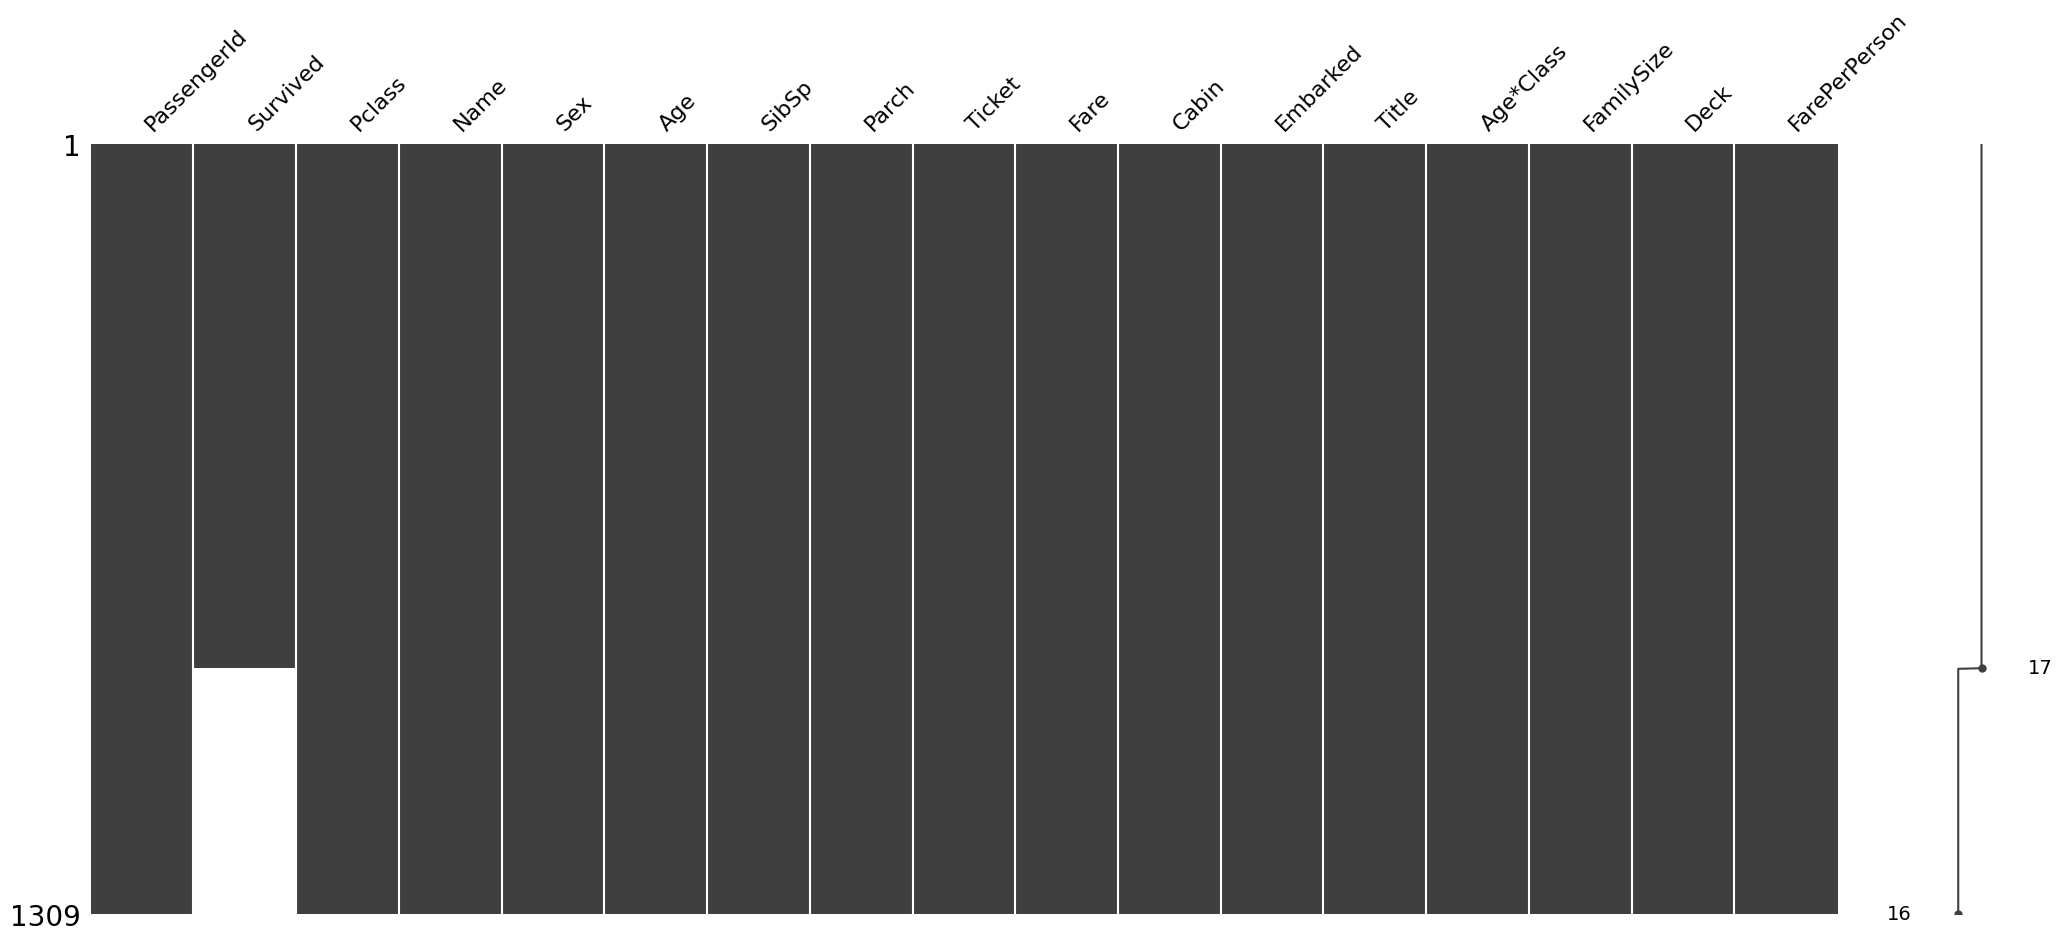

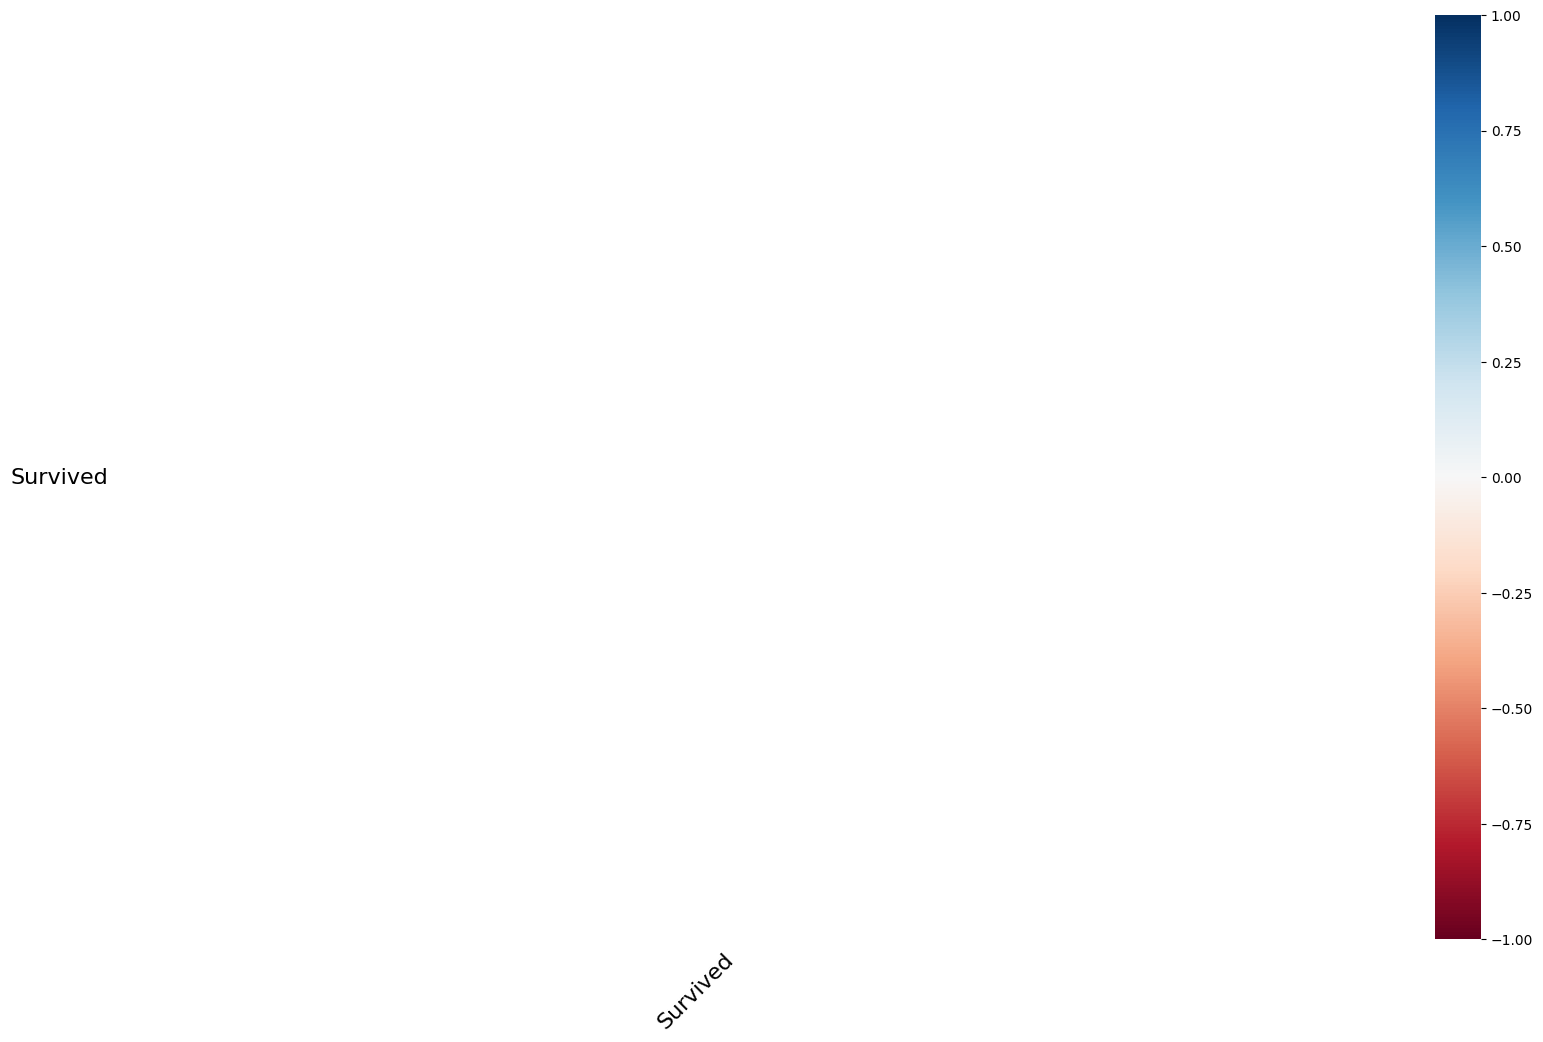

In [29]:
import missingno as msno
msno.bar(full)
plt.show()

msno.matrix(full)
plt.show()

msno.heatmap(full)
plt.show()

# Séparer train et test après la concaténation


In [30]:
len_train = len(train)


In [31]:
train_fe = full.iloc[:len_train]
test_fe  = full.iloc[len_train:]


In [32]:
print(len_train)
print(train_fe.shape)
print(test_fe.shape)


891
(891, 17)
(418, 17)


In [33]:
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age*Class,FamilySize,Deck,FarePerPerson
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,66.0,2,U,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.0,2,C,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,78.0,1,U,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,2,C,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,105.0,1,U,8.05000


In [34]:
test_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age*Class,FamilySize,Deck,FarePerPerson
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q,Mr,103.5,1,U,7.829200
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S,Mrs,141.0,2,U,3.500000
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q,Mr,124.0,1,U,9.687500
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S,Mr,81.0,1,U,8.662500
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S,Mrs,66.0,3,U,4.095833


# suppression du bruit

In [35]:
cols_to_drop = ["Cabin", "Name", "Ticket", "PassengerId"]

train_fe = train_fe.drop(columns=cols_to_drop)
test_fe  = test_fe.drop(columns=cols_to_drop)


In [36]:
test_fe.isnull().sum()


Survived         418
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Title              0
Age*Class          0
FamilySize         0
Deck               0
FarePerPerson      0
dtype: int64

In [37]:
train_fe.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
Age*Class        0
FamilySize       0
Deck             0
FarePerPerson    0
dtype: int64

# ENCODAGE DES VARIABLES CATÉGORIELLES

In [38]:
categorical_cols = ["Sex", "Embarked", "Title", "Deck"]


In [39]:
# One-Hot Encoding
train_encoded = pd.get_dummies(train_fe, columns=categorical_cols, drop_first=True)
test_encoded  = pd.get_dummies(test_fe,  columns=categorical_cols, drop_first=True)


In [40]:
# Aligner les colonnes entre train et test
train_encoded, test_encoded = train_encoded.align(test_encoded, join="left", axis=1)


In [41]:
# Remplir les NaN dans test (créés par align)
test_encoded = test_encoded.fillna(0)

In [47]:
train_encoded = train_encoded.drop(columns=["Age*Class"], errors="ignore")
test_encoded  = test_encoded.drop(columns=["Age*Class"], errors="ignore")

In [48]:
# Séparation X et y
X_train = train_encoded.drop("Survived", axis=1)
y_train = train_encoded["Survived"]

In [49]:
X_test = test_encoded.drop("Survived", axis=1, errors="ignore") 

In [50]:
train_encoded.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,Sex_male,Embarked_Q,...,Title_Noble,Title_Officer,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.0,1,0,7.2500,2,3.62500,True,False,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,38.0,1,0,71.2833,2,35.64165,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1.0,3,26.0,0,0,7.9250,1,7.92500,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1,35.0,1,0,53.1000,2,26.55000,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.0,3,35.0,0,0,8.0500,1,8.05000,True,False,...,False,False,False,False,False,False,False,False,False,True


In [51]:
full["Cabin"].dropna().str[0].unique()


array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [52]:
train_encoded.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize',
       'FarePerPerson', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Noble', 'Title_Officer', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U'],
      dtype='object')

In [53]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,Sex_male,Embarked_Q,Embarked_S,...,Title_Noble,Title_Officer,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
891,3,34.5,0,0,7.8292,1,7.829200,True,True,False,...,False,False,False,False,False,False,False,False,0.0,True
892,3,47.0,1,0,7.0000,2,3.500000,False,False,True,...,False,False,False,False,False,False,False,False,0.0,True
893,2,62.0,0,0,9.6875,1,9.687500,True,True,False,...,False,False,False,False,False,False,False,False,0.0,True
894,3,27.0,0,0,8.6625,1,8.662500,True,False,True,...,False,False,False,False,False,False,False,False,0.0,True
895,3,22.0,1,1,12.2875,3,4.095833,False,False,True,...,False,False,False,False,False,False,False,False,0.0,True


In [54]:
X_train.head()  

,Pclass,Age,SibSp,Parch,Fare,FamilySize,FarePerPerson,Sex_male,Embarked_Q,Embarked_S,...,Title_Noble,Title_Officer,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,3,22.0,1,0,7.2500,2,3.62500,True,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1,38.0,1,0,71.2833,2,35.64165,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,3,26.0,0,0,7.9250,1,7.92500,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,1,35.0,1,0,53.1000,2,26.55000,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,3,35.0,0,0,8.0500,1,8.05000,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [55]:
y_train.head()  

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

# ✅ Entraîner le modèle Machine Learning:

X_train → features d'entraînement

y_train → Survived (label)

X_test → features pour prédire Kaggle

# modèle choisi : RandomForest Simple

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [59]:
rf= RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

cv_scores=cross_val_score(
    rf,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy'
)

print("scores CV (5 folds) =", cv_scores)
print("Moyenne des scores CV =", np.mean(cv_scores))



scores CV (5 folds) = [0.82122905 0.82022472 0.83146067 0.81460674 0.84831461]
Moyenne des scores CV = 0.8271671583704727


In [60]:
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,6
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
y_pred = rf.predict(X_test)


In [63]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": y_pred
})


In [64]:
submission.to_csv("submission_random_forest.csv", index=False)
print("Fichier généré : submission_random_forest.csv")

Fichier généré : submission_random_forest.csv


In [69]:
import sys
import os

# Ajouter le dossier parent du notebook (racine du projet)
sys.path.append(os.path.abspath(".."))


In [70]:
from src.model_random_forest import train_random_forest
model = train_random_forest(X_train, y_train)

In [71]:
print("scores CV (5 folds) =", cv_scores)
print("Moyenne des scores CV =", np.mean(cv_scores))

scores CV (5 folds) = [0.82122905 0.82022472 0.83146067 0.81460674 0.84831461]
Moyenne des scores CV = 0.8271671583704727


In [79]:
import os
print(os.listdir("../data/submission"))


['submission_random_forest.csv', 'submission_random_forest_20251203_143950.csv']


In [82]:
import pandas as pd

# À ADAPTER selon tes vrais noms de fichiers
file1 = "../data/submission/submission_random_forest.csv"
file2 = "../data/submission/submission_random_forest_20251203_143950.csv"

s1 = pd.read_csv(file1)
s2 = pd.read_csv(file2)

print("Même nombre de lignes :", len(s1) == len(s2))

identiques = (s1["Survived"] == s2["Survived"]).all()
print("Identiques :", identiques)

ratio = (s1["Survived"] == s2["Survived"]).mean()
print("Pourcentage identique :", ratio)

# Lignes où ça diffère
diff = s1["Survived"] != s2["Survived"]
print("\nNombre de prédictions différentes :", diff.sum())

Même nombre de lignes : True
Identiques : True
Pourcentage identique : 1.0

Nombre de prédictions différentes : 0
